# Natural Language Processing: Introduction To Text Mining

[Open in colab](https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/Martin_Lukan_NLP_Intro_to_text_processing.ipynb)
1. Import NLTK and spacy and download the features you'll need (as you go along if necessary).
2. Retrieve the text of a press article of your choice from the internet (in English it will be simpler, but you can take the language of your choice). Assign it to a variable via copy/paste.
3.  Transform your text into sentence tokens, then into word tokens.
4. Count how often each word appears and make a graph (if possible a bar chart) that represents the 20 most common words in your text.
5. Remove the stopwords and the punctuation, and look again at which words are the most present. Again, make the same graph for comparison.
6. Use a stemmer and/or a lemmatizer to make the corpus of words even more relevant, and make a final graph.
7. Select the most relevant preprocessing and make a wordcloud highlighting the most used words in your text. Stopwords and punctuation should not appear because you have cleaned them up.
8. Share the link to your notebook as a solution to the challenge.

In [46]:
import nltk
import spacy
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/A19893678/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/A19893678/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 2. **Retrieve the text of a press article of your choice from the internet (retrieved from https://www.sciencedaily.com/releases/2021/05/210514134205.htm)**  
### 3. **Transform your text into sentence tokens, then into word tokens.**

In [45]:
file='files/warandpeace.txt'
with open(file,'r') as f:
    text = f.read().replace('\n',' ')
f.close()
#nltk.sent_tokenize(text)
words=nltk.word_tokenize(text)
   

### **4. Count how often each word appears and make a graph (if possible a bar chart) that represents the 20 most common words in your text.**

In [47]:
import pandas as pd
freqs=pd.DataFrame.from_dict(nltk.FreqDist(words),orient='index',columns=['freq'])


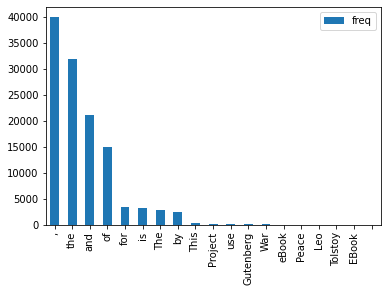

In [48]:
import matplotlib as plt
import numpy as np
freqs.iloc[:19,:].sort_values(by='freq',ascending=False).plot.bar();



### 5. Remove the stopwords and the punctuation, and look again at which words are the most present. Again, make the same graph for comparison.

In [84]:
import string 
wordscleaned=[w.lower() for w in words if w.lower() not in nltk.corpus.stopwords.words("english") and w not in string.punctuation]

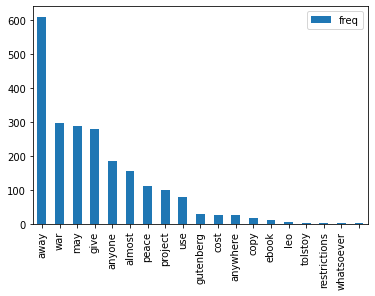

In [85]:
freqscl=pd.DataFrame.from_dict(nltk.FreqDist(wordscleaned),orient='index',columns=['freq'])
#freqscl.sort_values(by='freq',ascending=False)
freqscl.iloc[:19,:].sort_values(by='freq',ascending=False).plot.bar();

### 6. Use a stemmer and/or a lemmatizer to make the corpus of words even more relevant, and make a final graph.  


In [86]:
from nltk.stem import SnowballStemmer as sball
stem=sball("english")
wordsnew=[stem.stem(w) for w in wordscleaned]
wordsnew=list(set(wordsnew))

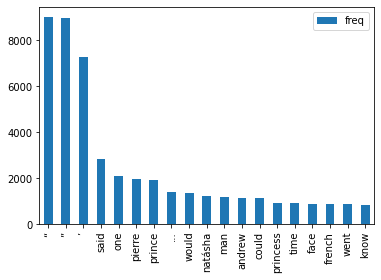

In [88]:
newwordf=pd.DataFrame.from_dict(nltk.FreqDist(wordscleaned),orient='index',columns=['freq'])
newwordf=newwordf.sort_values(by='freq',ascending=False)
newwordf.iloc[:19,:].plot.bar();

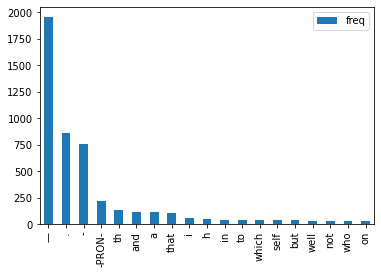

In [89]:
import spacy
import sys
#!{sys.executable} -m spacy download en
# Import of English rules
nlp = spacy.load('en')
lemtext=nlp(' '.join(wordsnew))
lemwords=[token.lemma_ for token in lemtext]
freqslem=pd.DataFrame.from_dict(nltk.FreqDist(lemwords),orient='index',columns=['freq'])
freqslem=freqslem.sort_values(by='freq',ascending=False)

freqslem.iloc[:19,:].plot.bar();

### 7. Select the most relevant preprocessing and make a wordcloud highlighting the most used words in your text. Stopwords and punctuation should not appear because you have cleaned them up.

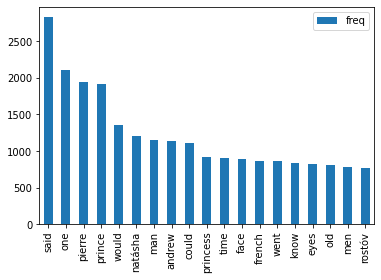

In [93]:
# Final clean up
newwordf.iloc[:19,:]
newwordfcl=newwordf.drop(["“","”","’","..."])
newwordfcl.iloc[:19,:].plot.bar();

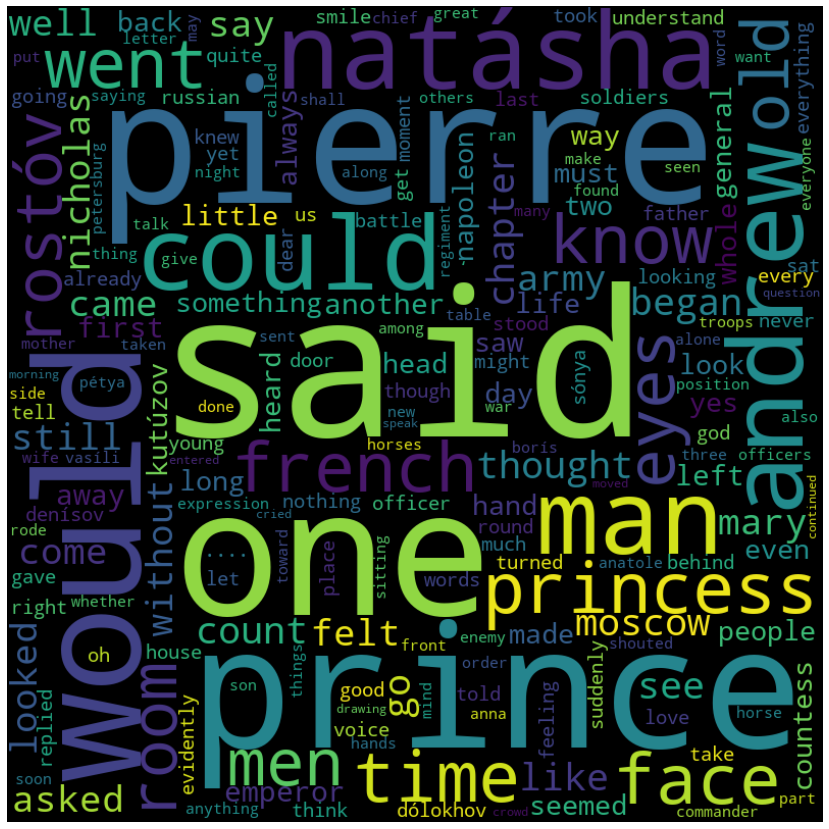

In [109]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=800, max_font_size=200, min_font_size=10)

text=("War and Peas by Leo Tolstoy")

# Generation of the wordcloud from a text
wordcloud.generate_from_frequencies(newwordfcl.to_dict(orient='dict')['freq'])

# Display thanks to Matplotlib
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show();